<a href="https://colab.research.google.com/github/lpoggetto/aulas_machine_learning_FIAP/blob/main/atividade_individual_20240919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício: Regressão Linear

1. Será que existe alguma relação entre a cotação do dólar e a índice da Bovespa (IBOV)?
2. Essa relação é diretamente proporcional (positiva) ou negativa?
3. Qual o racional econômico que explica essa relação?
4. Crie então sua máquina para prever o futuro do dólar base na cotação do índice IBOV
5. A Bolsa hoje está em quanto? E o dólar? Se o IBOV chegar em 100 mil pontos, qual o valor do dólar previsto?

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/usdbrl%20-%202024.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ymd     566 non-null    object 
 1   usdbrl  566 non-null    float64
 2   bov     566 non-null    float64
dtypes: float64(2), object(1)
memory usage: 13.4+ KB


1. Será que existe alguma relação entre a cotação do dólar e a índice da Bovespa (IBOV)?

<Axes: xlabel='bov', ylabel='usdbrl'>

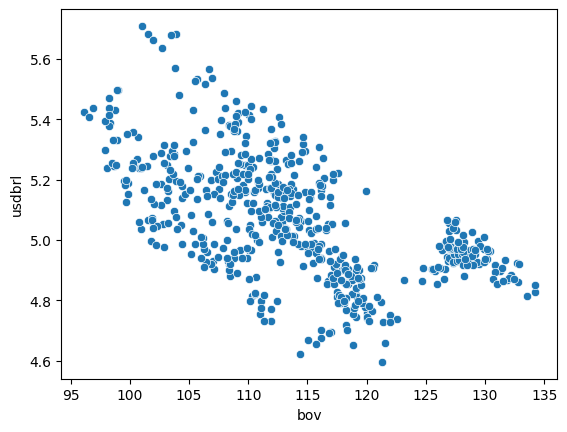

In [9]:
sns.scatterplot(data=df, x='bov', y='usdbrl')

<Axes: >

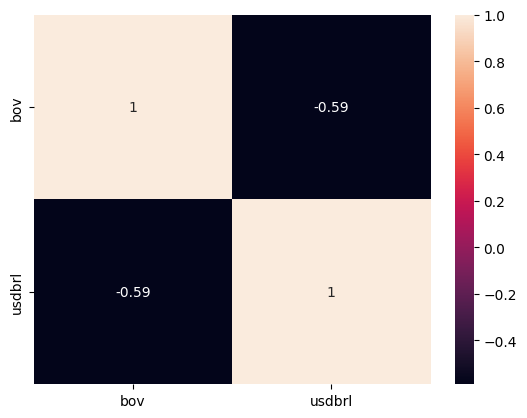

In [12]:
sns.heatmap(df[['bov', 'usdbrl']].corr(), annot=True)

In [14]:
reglin = LinearRegression()
reglin.fit(df[['bov']], df['usdbrl'])
print(reglin.coef_)
print(reglin.intercept_)

[-0.0134883]
6.6027600932084525


In [16]:
def prever_dolar(indice):
    return reglin.coef_[0] * indice + reglin.intercept_
prever_dolar(100000)

-1342.227476291261

In [18]:
prev_treino = reglin.predict(df[['bov']])

In [19]:
prev_treino

array([5.20103427, 5.20653682, 5.24036548, 5.23287394, 5.21724882,
       5.22769241, 5.20295783, 5.17723996, 5.17934629, 5.16048573,
       5.16795717, 5.16399444, 5.14584175, 5.13115946, 5.13332177,
       5.14687172, 5.11629832, 5.10165798, 5.08382011, 5.09328283,
       5.09013452, 5.07550241, 5.09349513, 5.09617148, 5.0887664 ,
       5.09211879, 5.08890776, 5.08584686, 5.07362133, 5.0708619 ,
       5.06645338, 5.05392288, 5.04916461, 5.07145363, 5.08020255,
       5.09577547, 5.08004136, 5.09196758, 5.09757521, 5.0766674 ,
       5.04926362, 5.04937233, 5.05870314, 5.09755376, 5.10281434,
       5.06643787, 5.06963743, 5.09594043, 5.12002312, 5.13308411,
       5.10404204, 5.07755236, 5.04741167, 5.03603267, 5.02095396,
       5.01845998, 4.99693845, 4.99655781, 5.00118901, 4.98397268,
       4.98066009, 4.9841742 , 4.96298515, 4.96690539, 4.99920124,
       5.00806845, 4.99951188, 5.00679367, 5.02526469, 5.03613613,
       5.02756971, 5.03566741, 5.04233549, 5.05084107, 5.06045